In [2]:
import numpy as np
import cv2
from os.path import join
from time import time

# !pip3 install git+https://github.com/iitzco/faced.git
from faced import FaceDetector
# download repository https://github.com/TropComplique/mtcnn-pytorch
from mtcnn.src import detect_faces

from PIL import Image

# OpenCV

In [3]:
cascades_path = '/home/egor/venvs/face_recognition/lib/python3.6/site-packages/cv2/data'

In [4]:
!ls $cascades_path

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalcatface.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml
__init__.py
__pycache__


In [5]:
face_cascade = cv2.CascadeClassifier(join(cascades_path, 'haarcascade_frontalface_alt.xml'))

In [6]:
# defining webcam
cap = cv2.VideoCapture(0) 

fps = 0
while(True):
    # getting image from webcam
    ret, img = cap.read()
    # converting rbg image from webcam to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    t0 = time()
    # detectMultiScale needs gray image
    faces = face_cascade.detectMultiScale(gray_img)
    # time of detection
    dt = time() - t0
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    fps = 1. / dt
    cv2.putText(img, 'FPS {:.4f}'.format(fps), (10, 50), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0))
    cv2.imshow('frame',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Example of detection. Average fps were 20.

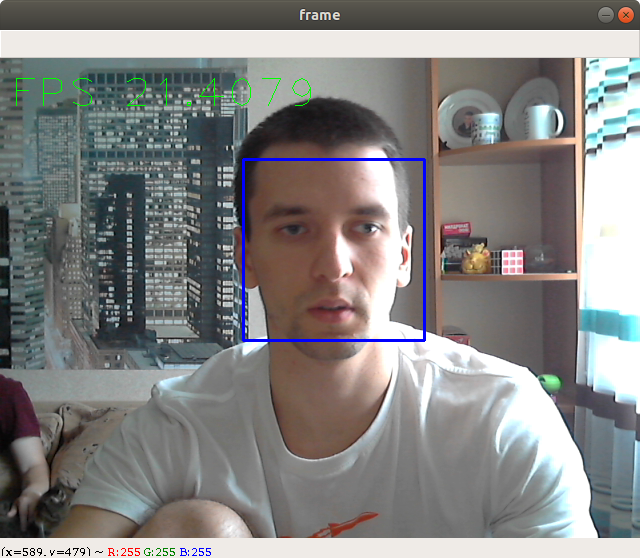

# Faced

[link](https://github.com/iitzco/faced) to library

In [8]:
faced_detector = FaceDetector()

In [9]:
cap = cv2.VideoCapture(0) 

fps = 0
while(True):
    # getting image from webcam
    ret, img = cap.read()
    rgb_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    
    t0 = time()
    boxes = faced_detector.predict(rgb_img)
    # time of detection
    dt = time() - t0
    
    # gives x, y of center of face
    for x, y, w, h, _ in boxes:
        x0, y0 = int(x - w/2), int(y - h/2)
        cv2.rectangle(img,(x0,y0),(x0 + w, y0 + h),(255,0,0),2)
    
    fps = 1. / dt
    cv2.putText(img, 'FPS {:.4f}'.format(fps), (10, 50), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0))
    cv2.imshow('frame',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Example of detection with [faced](https://github.com/iitzco/faced) model. Average fps is 22. This is even higher than with cv2. It also has more robust detections.

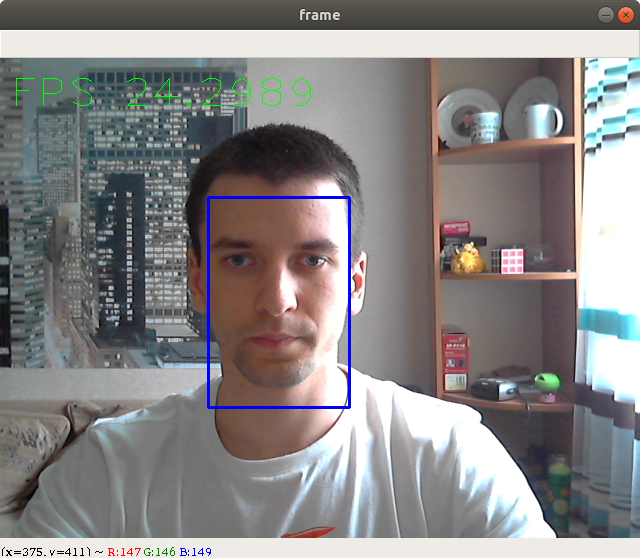

# MTCNN

[link](https://github.com/TropComplique/mtcnn-pytorch) to used library

In [11]:
cap = cv2.VideoCapture(0) 

fps = 0
while(True):
    # getting image from webcam
    ret, img = cap.read()
#     pil_img = Image.fromarray(img).convert('RGB')
    rgb_img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(rgb_img)
    
    t0 = time()
    try:
        bounding_boxes, landmarks = detect_faces(pil_img)
    except ValueError:
        pass
    # time of detection
    dt = time() - t0
    
    # gives x, y of center of face
    for x0, y0, x1, y1, _ in bounding_boxes:
        x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
        cv2.rectangle(img,(x0, y0),(x1, y1),(255,0,0),2)
    
    fps = 1. / dt
    cv2.putText(img, 'FPS {:.4f}'.format(fps), (10, 50), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0))
    cv2.imshow('frame',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Example of detection with [MTCNN](https://arxiv.org/abs/1604.02878) model. The best detection quality but the slowest speed. Average FPS is about 6.

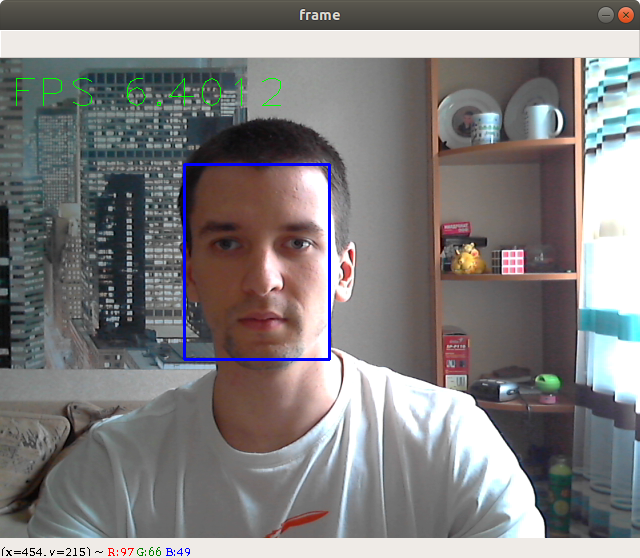